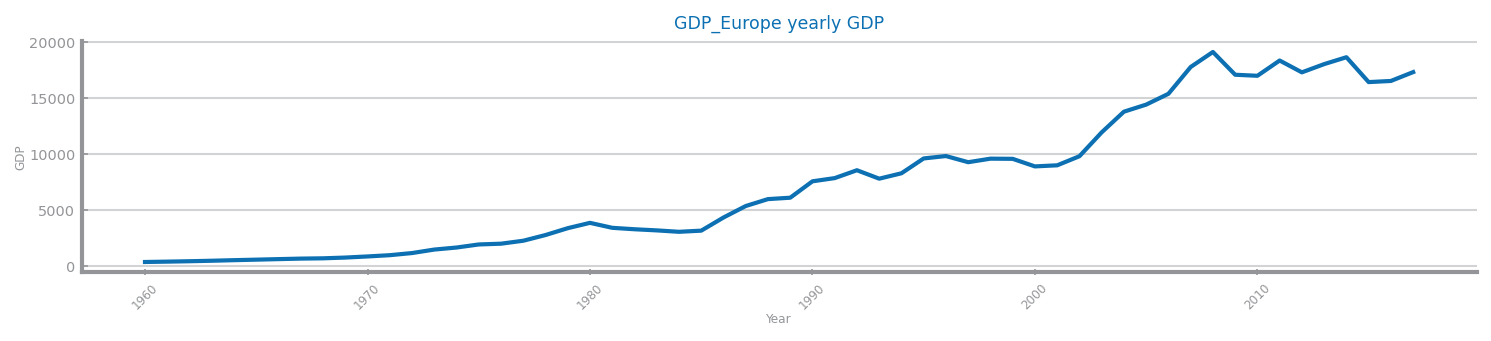

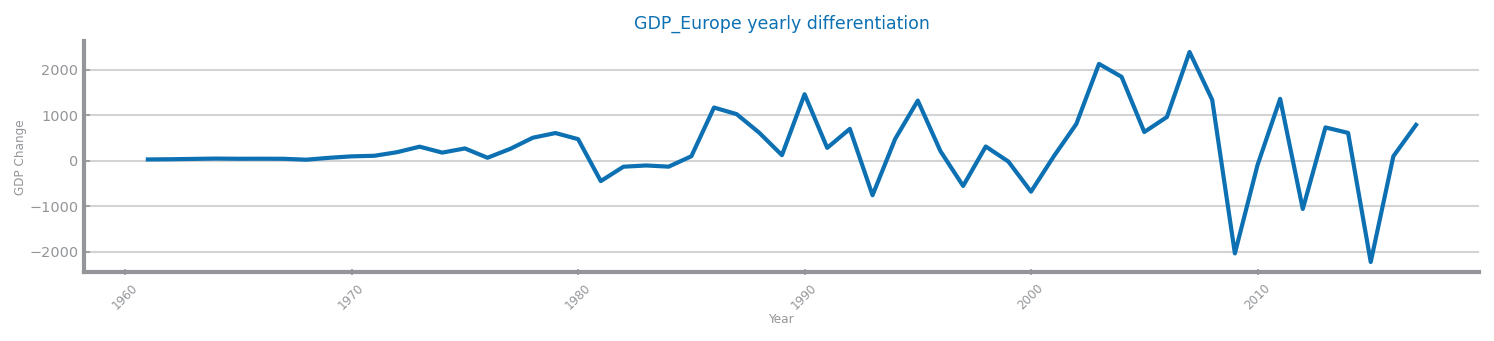

In [1]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

# File details
file_tag = "GDP_Europe"
filename = "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv"
index = "Year"
target = "GDP"

# Load the dataset
data: DataFrame = read_csv(
    filename,
    sep=",",  # Comma-separated values
    decimal=".",  # Use period for decimal
    parse_dates=[index],  # Parse the Year column as datetime
    infer_datetime_format=True,
)
data.set_index(index, inplace=True)

# Extract the GDP series
series: Series = data[target]

# Visualize the original series (yearly granularity)
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel="Year",  # Correct x-axis label
    ylabel=target,  # Correct y-axis label
    title=f"{file_tag} yearly {target}",  # Correct title
)
show()

# Apply first-order differentiation to calculate yearly changes
ss_diff: Series = series.diff()

# Visualize the differentiated series (yearly differences)
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_diff.index.to_list(),
    ss_diff.to_list(),
    title=f"{file_tag} yearly differentiation",
    xlabel="Year",  # Correct x-axis label
    ylabel=f"{target} Change",  # Label as change in GDP
)
show()


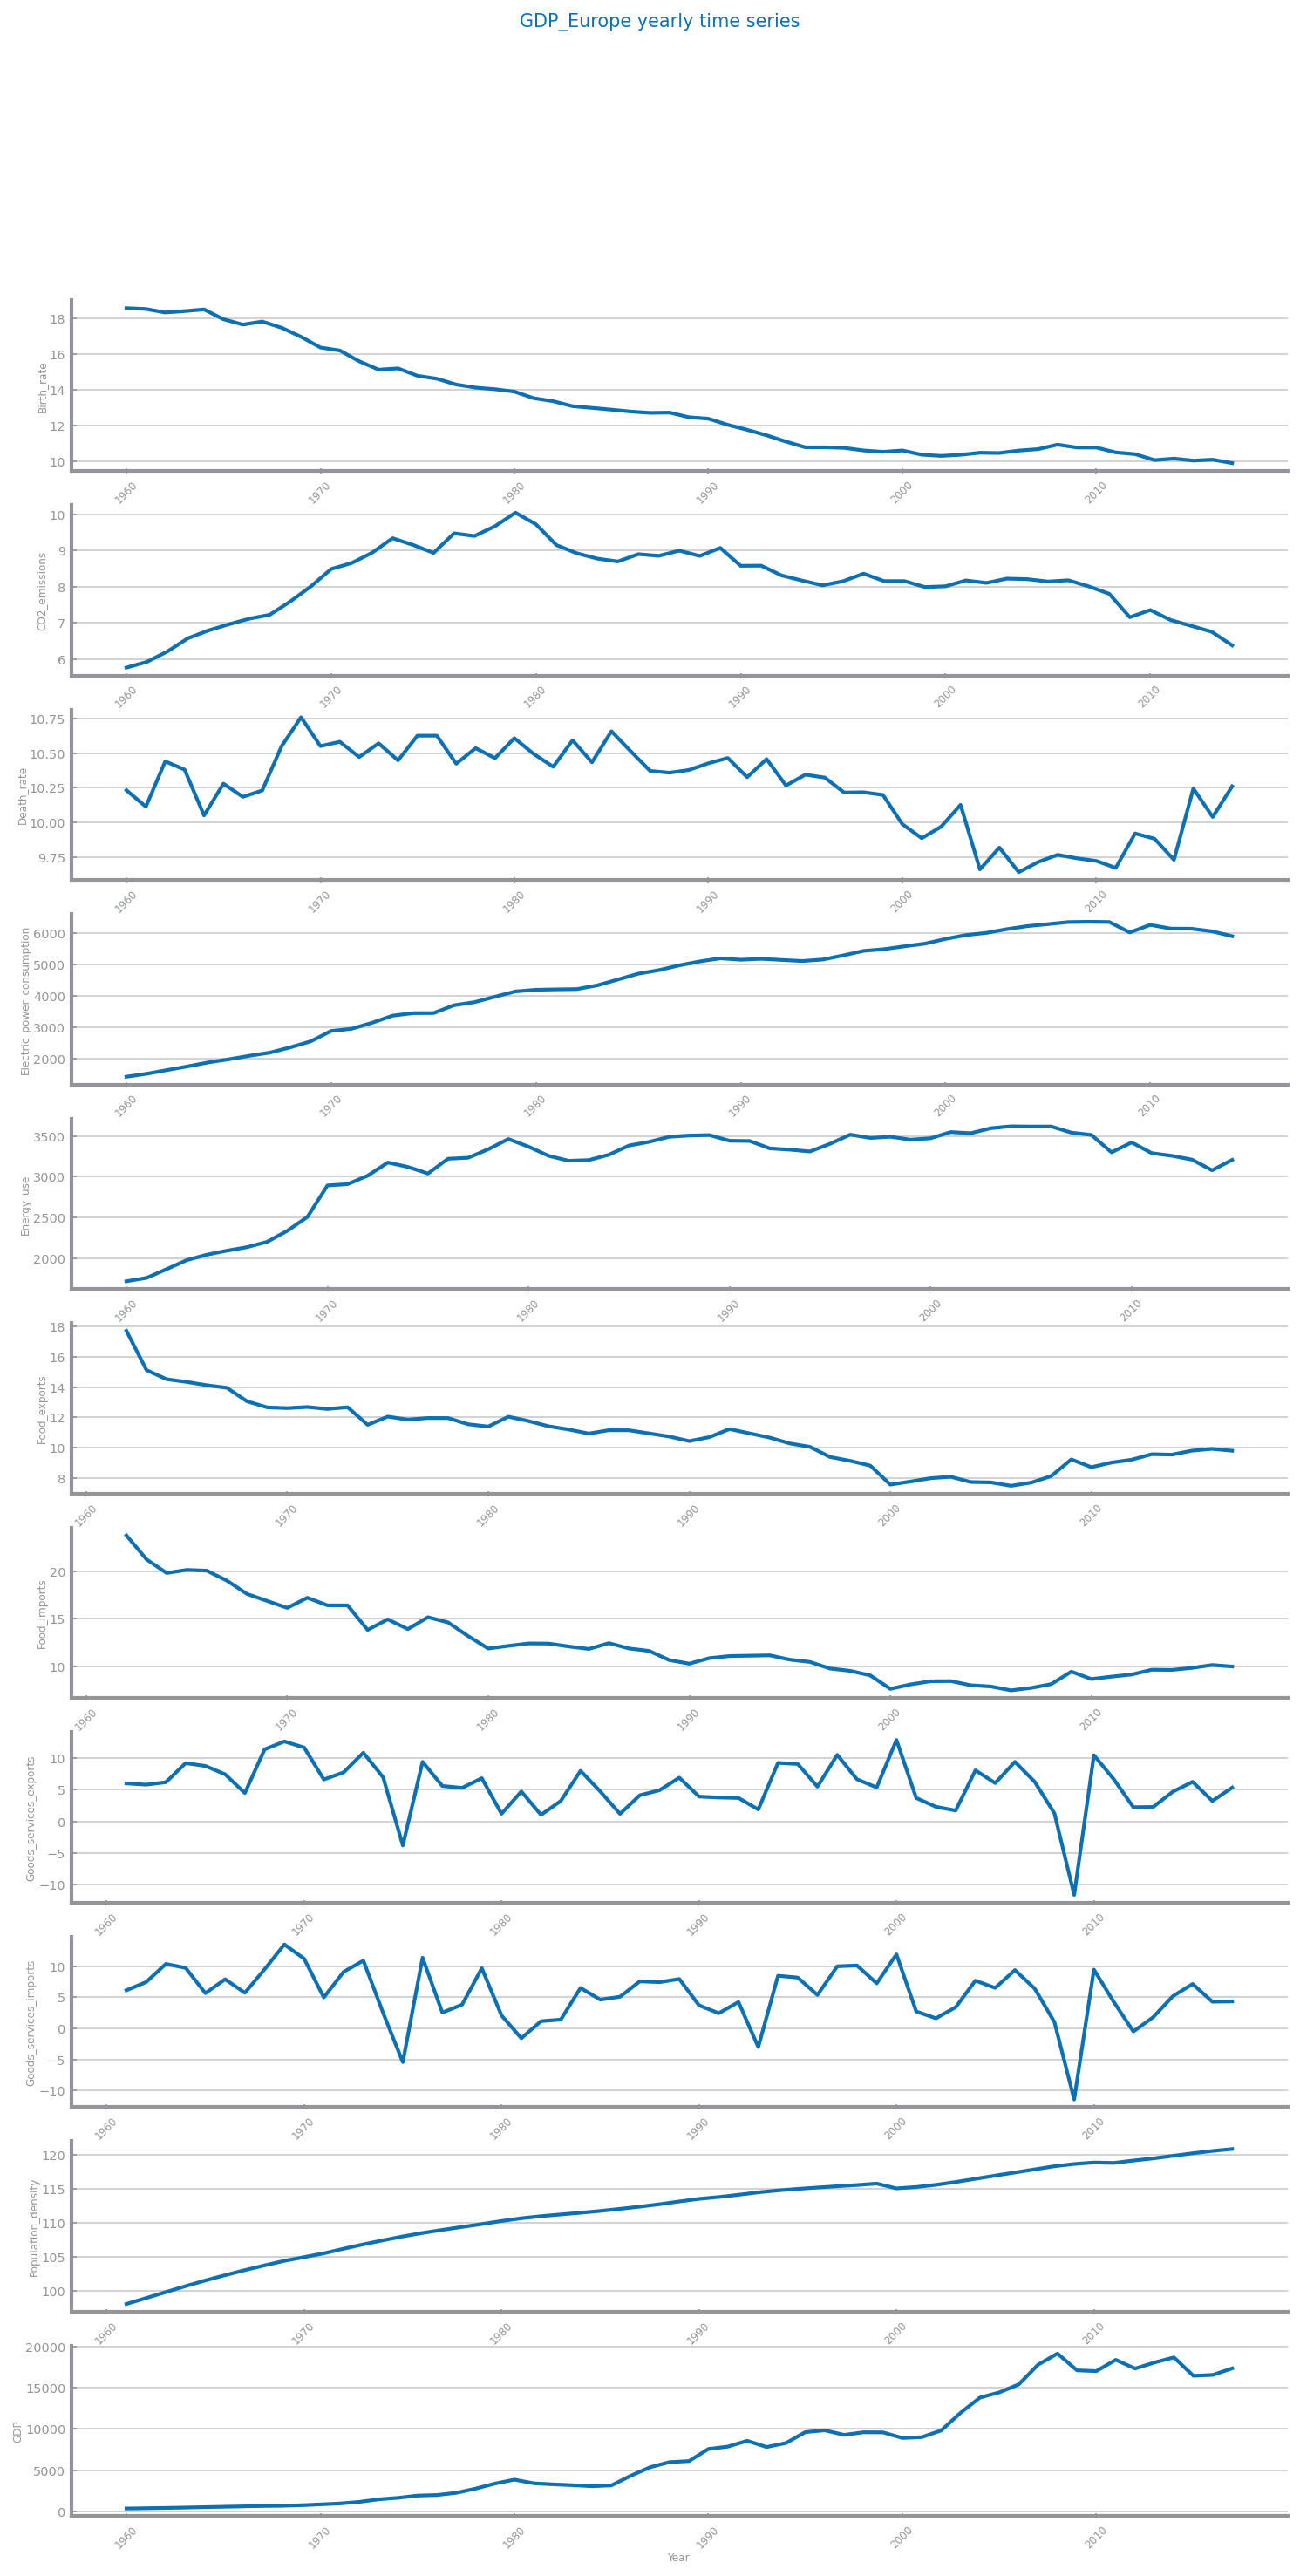

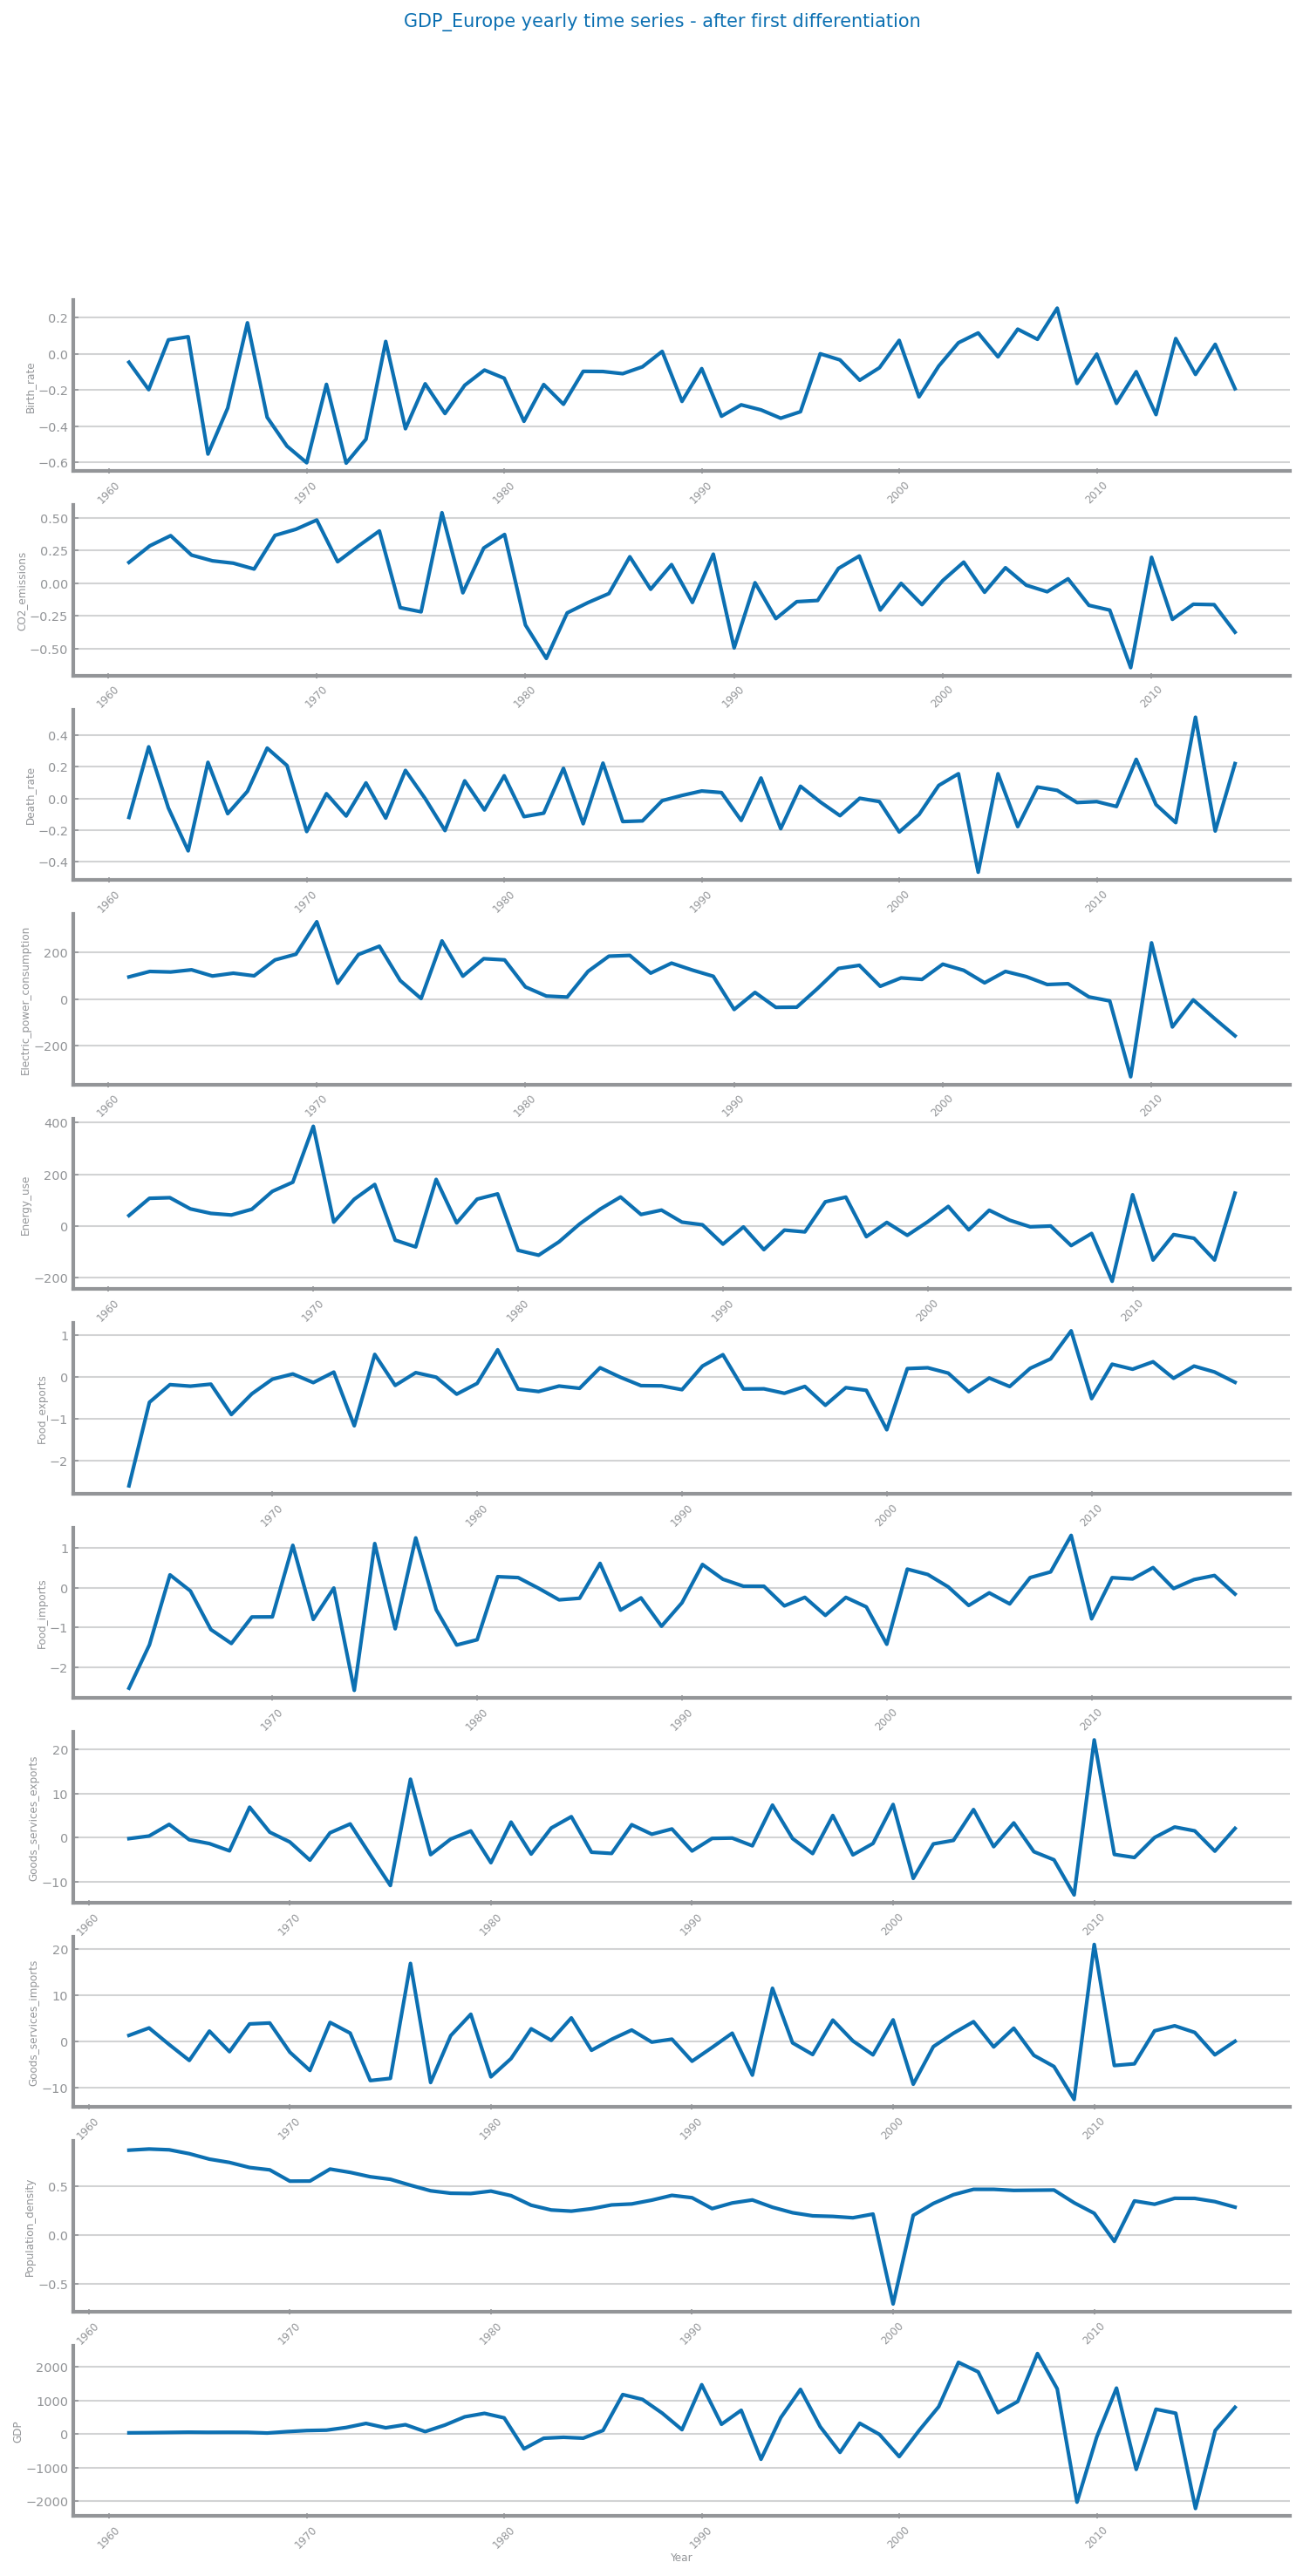

In [2]:
from dslabs_functions import plot_ts_multivariate_chart
from pandas import DataFrame

# Visualize the original multivariate series
plot_ts_multivariate_chart(data, title=f"{file_tag} yearly time series")
show()

# Apply first-order differentiation to the multivariate series (yearly changes)
diff_df: DataFrame = data.diff()

# Visualize the differentiated multivariate series
plot_ts_multivariate_chart(diff_df, title=f"{file_tag} yearly time series - after first differentiation")
show()
